# **Heart Disease Prediction**

In this project, I have collected data from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) to identify if a person if suffering from heart disease or not.

# 1. Libraries and Data

## **1.1 Loading libraries**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries are imported succefully.")

All libraries are imported succefully.


## **1.2 Reading data**

In [4]:
data = pd.read_csv("heart.csv")

# **2. Exploratory Data-analysis**

## **2.1 Understaing features**

1. age: in years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

## **2.2 Basic information**

In [5]:
display(data.head(), data.describe(), data.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
print("Numbers of entries: {0}".format(data.shape[0]))
print("Numbers of attributes: {0}".format(data.shape[1]))

Numbers of entries: 303
Numbers of attributes: 14


## **2.3 Checking for null values**

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the dataset

## **2.4 Univariate analysis**

### 2.4.1 Numerical features

age, thalach, chol, trestbps, oldpeak

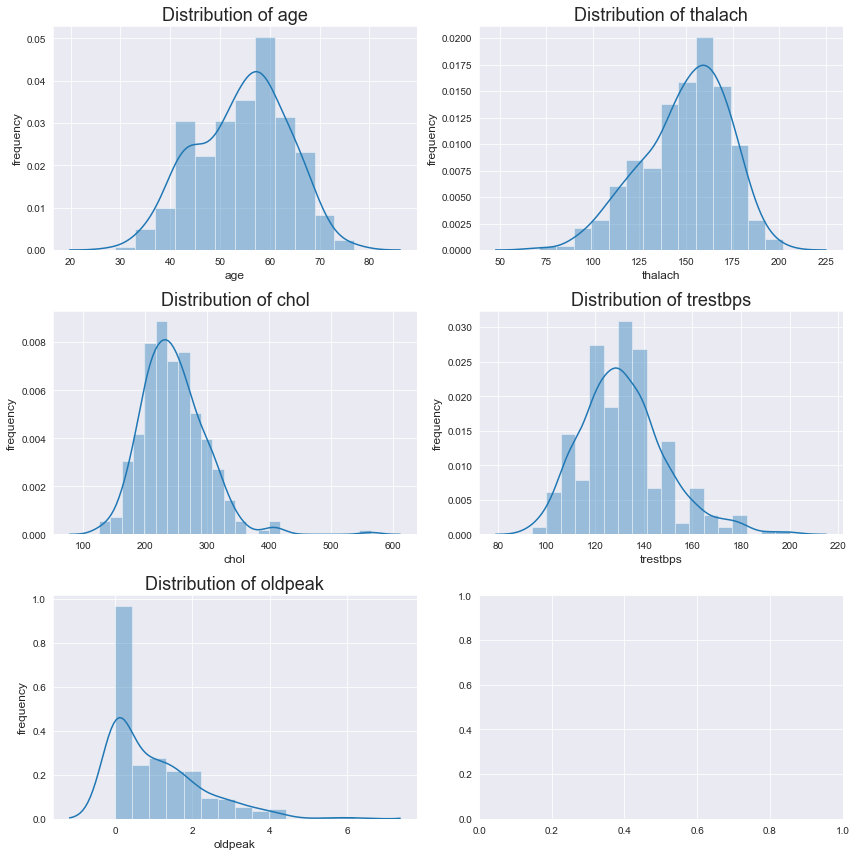

In [9]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(3, 2, figsize=(12,12))

for i, feature in enumerate(['age','thalach','chol','trestbps','oldpeak']):
    
    sns.distplot(data[feature], ax=axes[i//2,i%2])
    
    axes[i//2,i%2].set_title('Distribution of {}'.format(feature), fontsize=18)
    axes[i//2,i%2].set_xlabel(str(feature), fontsize=12)
    axes[i//2,i%2].set_ylabel("frequency", fontsize=12)
    
plt.tight_layout()
plt.show()

### 2.4.2 Categorical features

sex, cp, fbs, restecg, exang, slope, ca, thal

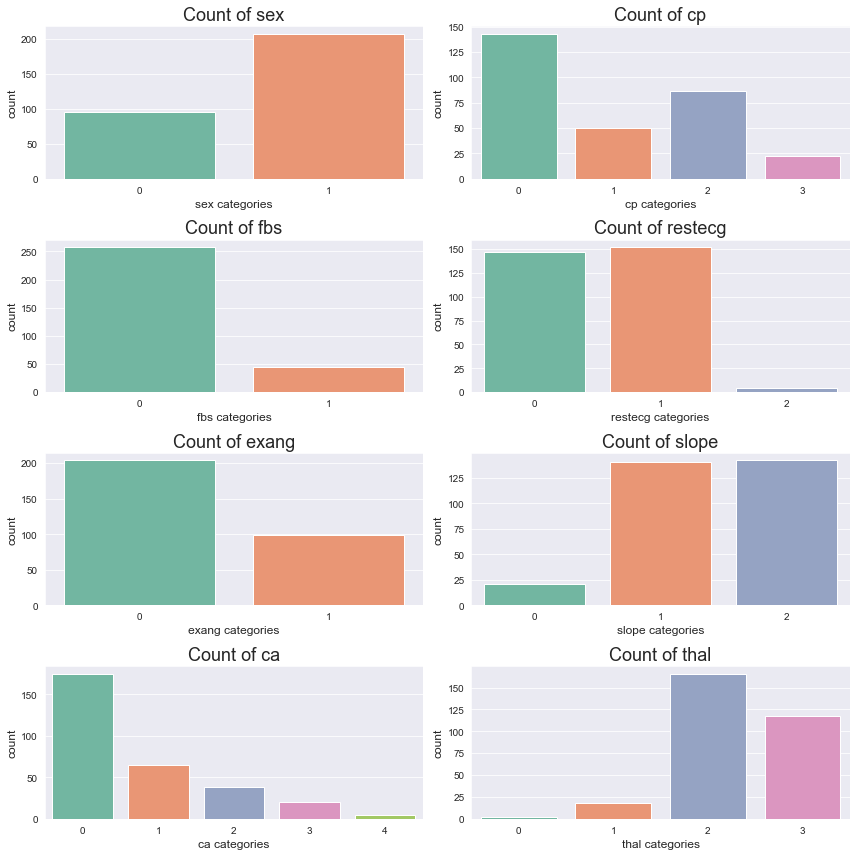

In [10]:
fig,axes = plt.subplots(4, 2, figsize=(12,12))

for i,feature in enumerate(['sex','cp','fbs','restecg','exang','slope','ca','thal']):
    sns.countplot(x = feature, data = data, ax = axes[i//2,i%2], palette="Set2", edgecolor={"white"})
    
    axes[i//2,i%2].set_title('Count of {}'.format(feature), fontsize=18)
    axes[i//2,i%2].set_ylabel('count', fontsize=12)
    axes[i//2,i%2].set_xlabel('{} categories'.format(feature), fontsize=12)

plt.tight_layout()
plt.show()


### 2.4.3 Target feature

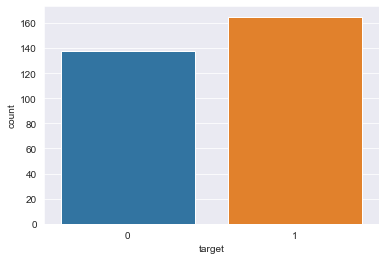

In [11]:
sns.countplot(x='target', data=data)

plt.show()

## 2.5 Bivariate analysis (one feature by target values)

### 2.5.1 Numerical features by target values

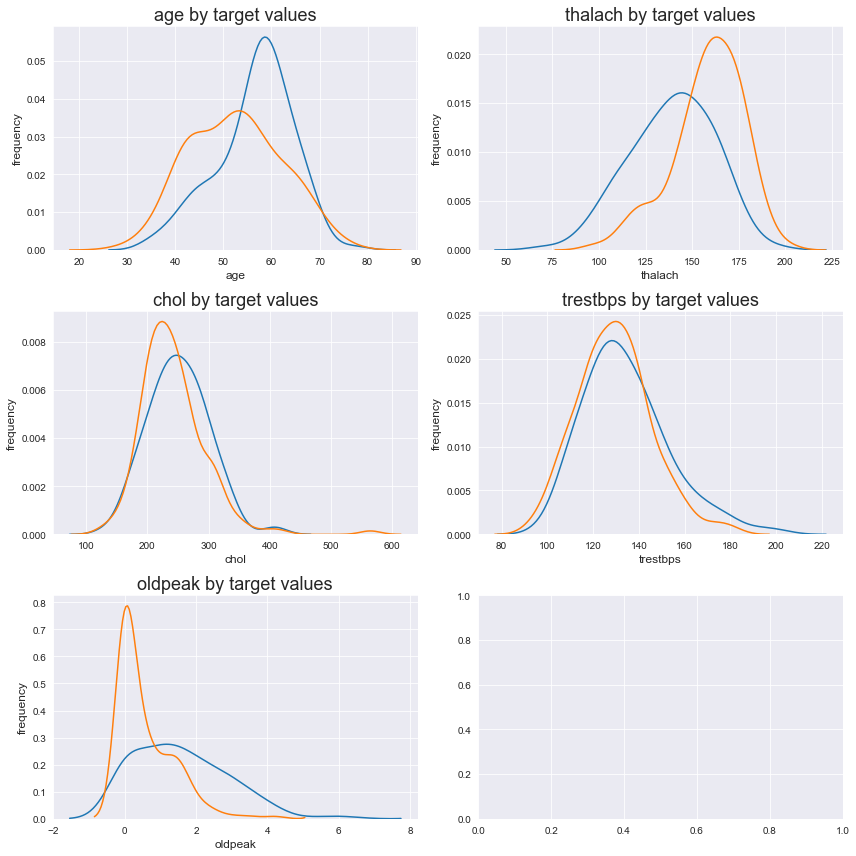

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))

for i, feature in enumerate(['age','thalach','chol','trestbps','oldpeak']):
    
    sns.distplot(data[data["target"]==0][feature], ax=axes[i//2,i%2], hist=False)
    sns.distplot(data[data["target"]==1][feature], ax=axes[i//2,i%2], hist=False)
    
    axes[i//2,i%2].set_title('{} by target values'.format(feature), fontsize=18)
    axes[i//2,i%2].set_xlabel(str(feature), fontsize=12)
    axes[i//2,i%2].set_ylabel("frequency", fontsize=12)
    
plt.tight_layout()
plt.show()

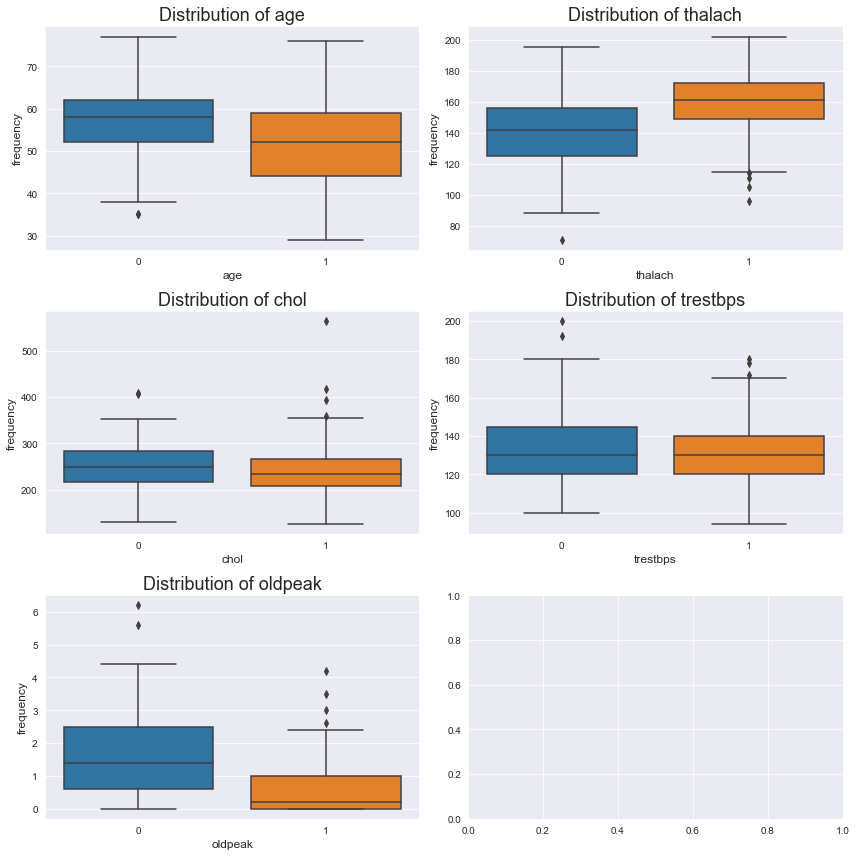

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))

for i, feature in enumerate(['age','thalach','chol','trestbps','oldpeak']):
    
    sns.boxplot(x=data["target"], y=data[feature], data=data, ax=axes[i//2,i%2])
    #sns.violinplot(x=data["target"], y=data[feature], data=data, ax=axes[i//2,i%2])
    
    axes[i//2,i%2].set_title('Distribution of {}'.format(feature), fontsize=18)
    axes[i//2,i%2].set_xlabel(str(feature), fontsize=12)
    axes[i//2,i%2].set_ylabel("frequency", fontsize=12)
    
plt.tight_layout()
plt.show()

### 2.5.2 Categorical features by target values

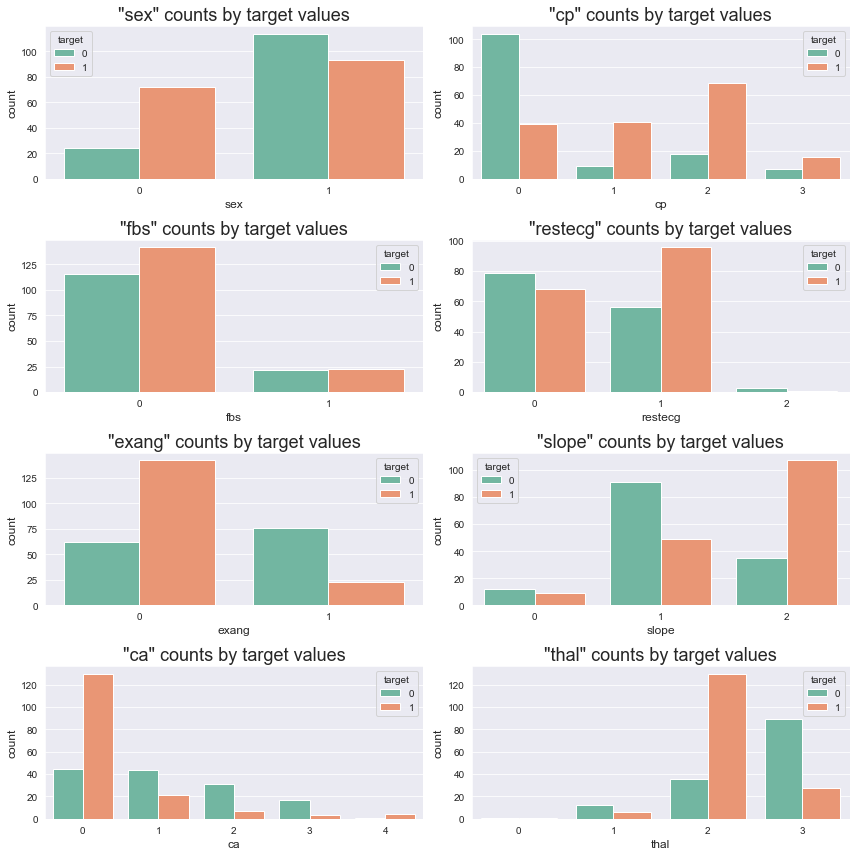

In [14]:
fig,axes = plt.subplots(4, 2, figsize=(12,12))

for i,feature in enumerate(['sex','cp','fbs','restecg','exang','slope','ca','thal']):
    sns.countplot(x = feature, data = data, hue="target", ax = axes[i//2,i%2], palette="Set2", edgecolor={"white"})
    
    axes[i//2,i%2].set_title('"{}" counts by target values'.format(feature), fontsize=18)
    axes[i//2,i%2].set_ylabel('count', fontsize=12)
    axes[i//2,i%2].set_xlabel('{}'.format(feature), fontsize=12)

plt.tight_layout()
plt.show()


## 2.6 Multivariate analysis (any two features vs target)

### 2.6.1 Numerical features (two) vs target

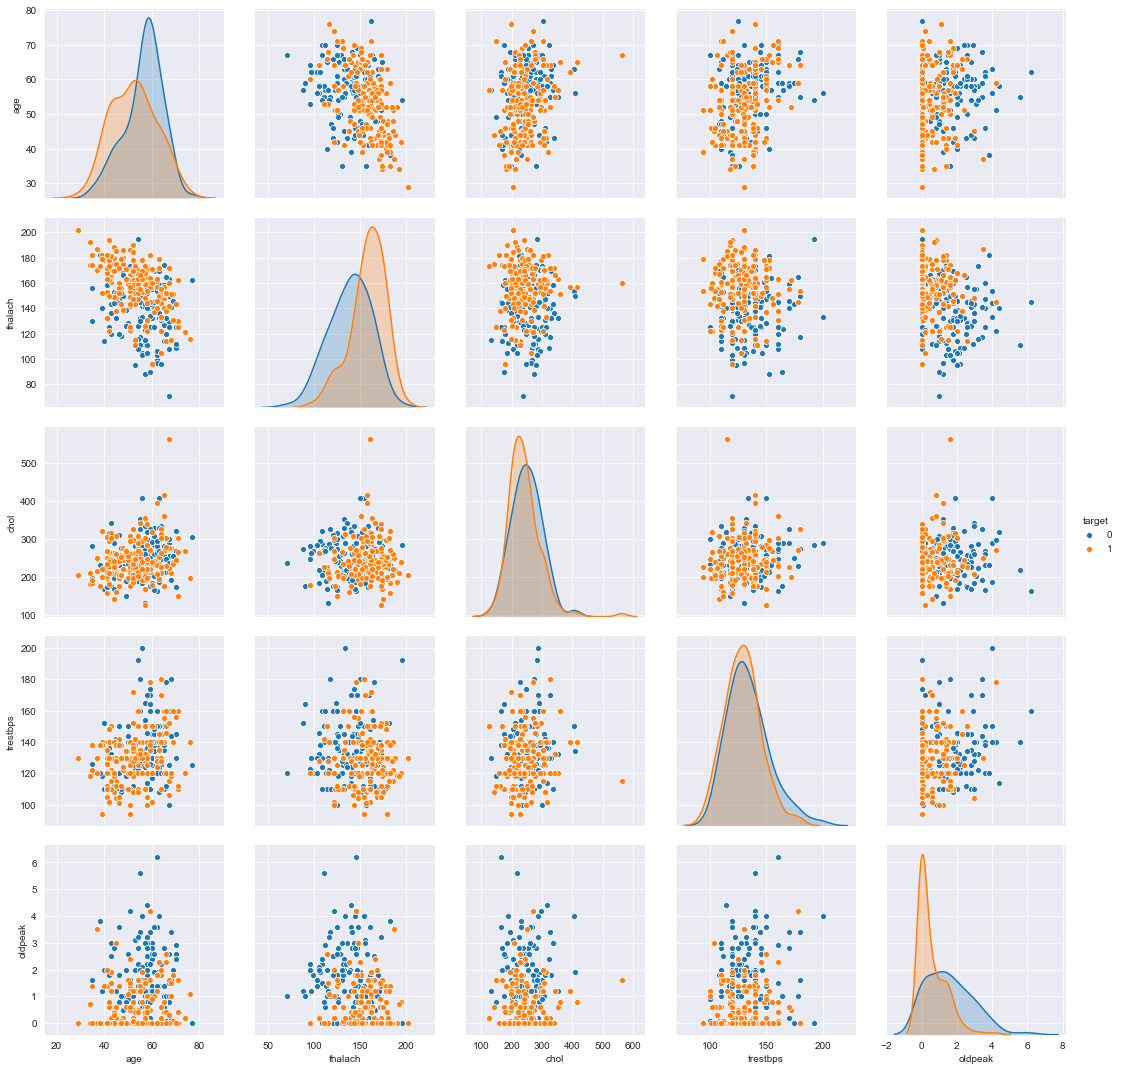

In [15]:
sns.pairplot(data, vars=['age','thalach','chol','trestbps','oldpeak'], hue="target", height=3)

plt.show()

### 2.6.2 Categorical features (two) vs target

Here we are taking three categorical variables - cp, fbs and thal and comparing them with sex, thal and target.

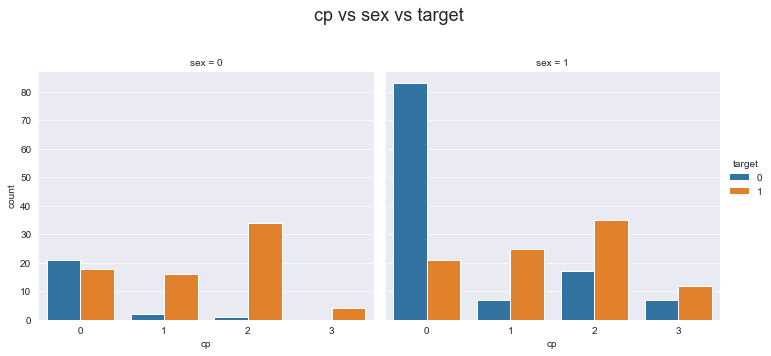

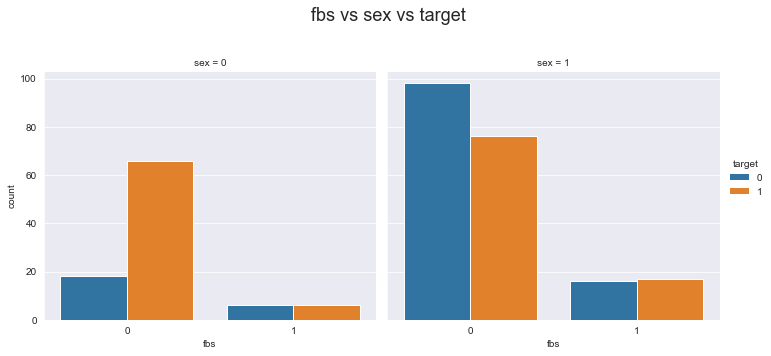

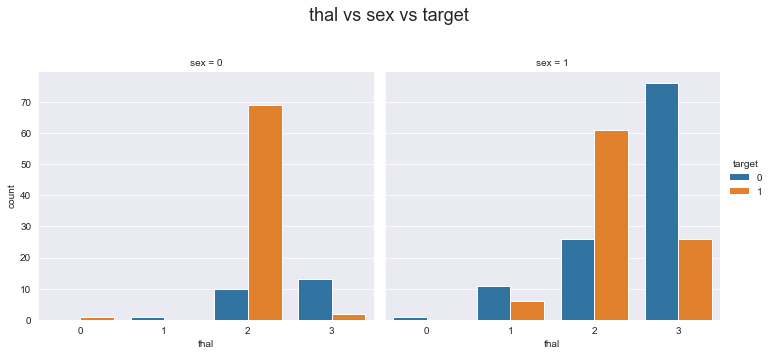

In [16]:
for var in ["cp", "fbs", "thal"]:

    sns.catplot(x=var, hue="target", data=data, col="sex", kind="count")

    plt.suptitle("{0} vs sex vs target".format(var), fontsize=18)
    plt.subplots_adjust(top=0.8)
    plt.show()

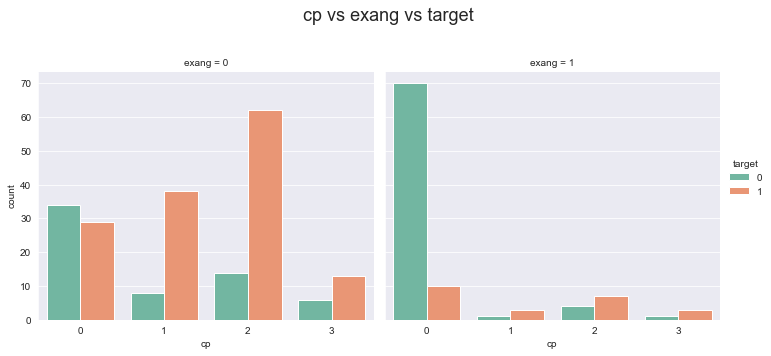

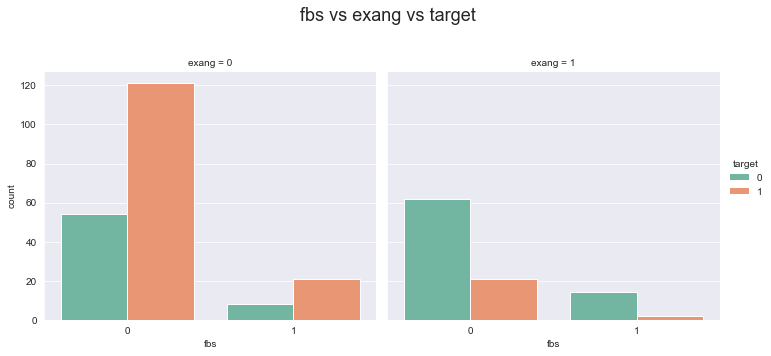

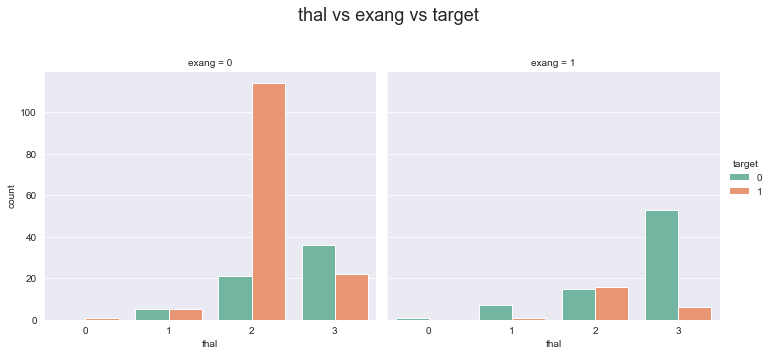

In [17]:
for var in ["cp", "fbs", "thal"]:

    sns.catplot(x=var, hue="target", data=data, col="exang", kind="count", palette="Set2")

    plt.suptitle("{0} vs exang vs target".format(var), fontsize=18)
    plt.subplots_adjust(top=0.8)
    plt.show()

# 3. Data preprocessing

## 3.1 Splitting the dataset into training and test set

In [18]:
X = data.drop("target", axis=1)
y = data["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3.2 Scaling the features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# 4. Model buiding

## 4.1 K-NN

### 4.1.1 Training the model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20,2)),
          'weights':['uniform', 'distance'],
          'leaf_size':list(range(1,20,2)),
          'p':[1, 2]}

model_knn = GridSearchCV(knn, params, cv=3)
model_knn.fit(X_train,y_train)

print("model trained")

model trained


C:\Users\Dipen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
model_knn.best_params_

{'leaf_size': 1, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

### 4.1.2 Making predictions

In [23]:
y_predicted = model_knn.predict(X_test)

### 4.1.3 Checking accuracy

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

def get_accuracy(y_true, y_pred):
    """
    This function returns accuracy score and false-negative for given test data.
    """
    scores = []
    
    scores.append(round(accuracy_score(y_true, y_pred), 5) * 100)
    scores.append(confusion_matrix(y_true, y_pred).ravel()[2])
    
    print("Accuracy:", scores[0], "%")
    print("False-positives:", scores[1])
    
    return scores

In [62]:
scores = dict()

scores_knn = get_accuracy(y_test, y_predicted)
scores["knn"] = scores_knn

Accuracy: 84.615 %
False-positives: 6


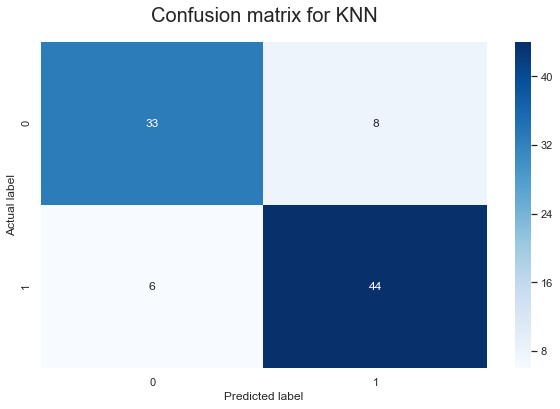

In [63]:
cf_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10,6))

sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Confusion matrix for KNN", fontdict={"fontsize": 20}, pad=20)

plt.show()

## 4.2 Decision Tree

### 4.2.1 Traning the model

In [64]:
from sklearn.tree import DecisionTreeClassifier

decision_tree= DecisionTreeClassifier(random_state=7)

params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}

model_decision_tree = GridSearchCV(decision_tree, params, cv=3)
model_decision_tree.fit(X_train,y_train)

print("model trained")

model trained


C:\Users\Dipen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
model_decision_tree.best_params_

{'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7}

### 4.2.2 Making predictions

In [66]:
y_predicted = model_decision_tree.predict(X_test)

### 4.2.3 Checking the accuracy

In [67]:
scores_decision_tree = get_accuracy(y_test, y_predicted)
scores["decision_tree"] = scores_decision_tree

Accuracy: 72.527 %
False-positives: 17


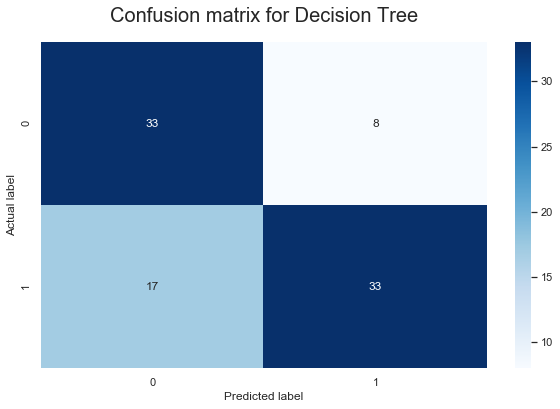

In [68]:
cf_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10,6))

sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Confusion matrix for Decision Tree", fontdict={"fontsize": 20}, pad=20)

plt.show()

# 5. Conclusion

In [71]:
scores

{'knn': [84.615, 6], 'decision_tree': [72.527, 17]}

In [72]:
df_score = pd.DataFrame(data=scores.values(), columns=["Accuracy", "False-negative"], index=scores.keys())

df_score

,Accuracy,False-negative
knn,84.615,6
decision_tree,72.527,17


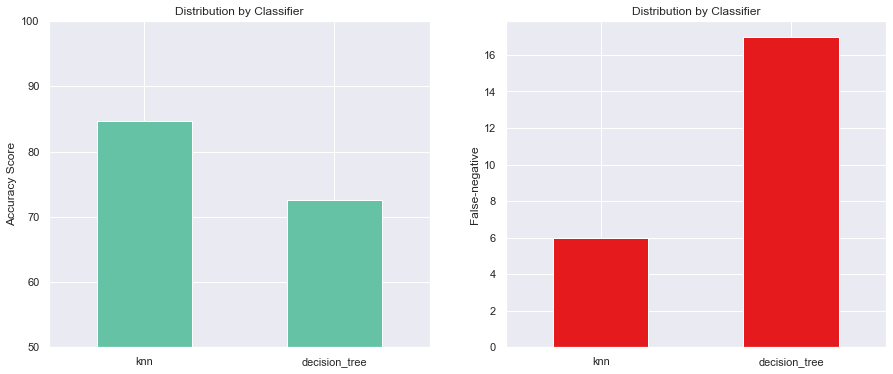

In [75]:
# plot 1
plt.subplot(1,2,1)

df_score["Accuracy"].plot(kind='bar', ylim=(50,100), figsize=(15,6), align='center', colormap="Set2")

plt.xticks(np.arange(2), df_score.index, rotation=360)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')

# plot 2
plt.subplot(1,2,2)

df_score["False-negative"].plot(kind='bar', figsize=(15,6), align='center', colormap="Set1")

plt.xticks(np.arange(2), df_score.index, rotation=360)
plt.ylabel('False-negative')
plt.title('Distribution by Classifier')

plt.show()

We want a classifier that can give highest acccuracy and lowest False-negative, so from above two classifiers KNN with the given parameters will work best.<br>

<p>
<b>Accuracy:</b> 84.615%<br>
<b>False-negatuve:</b> 6
</p>